In [77]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [84]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [86]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [88]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [90]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [95]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

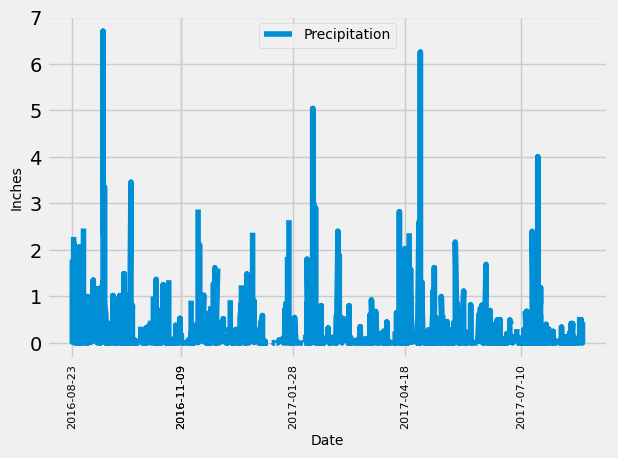

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

precip_subset = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precip_subset, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date
sorted_prec_df = precipitation_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sorted_prec_df.index, sorted_prec_df['Precipitation'])

# Setting x-axis parameters
xloc = ['2016-08-23', '2016-11-09', '2016-11-09', '2017-01-28', '2017-04-18','2017-07-10'] 
plt.xticks(xloc, rotation='vertical',fontsize=8)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Inches',fontsize=10)
plt.legend(['Precipitation'], loc = 'upper center', fontsize=10)
plt.tight_layout()
plt.show()

In [116]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_stats= precipdf.describe()
precip_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [119]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [121]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [123]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

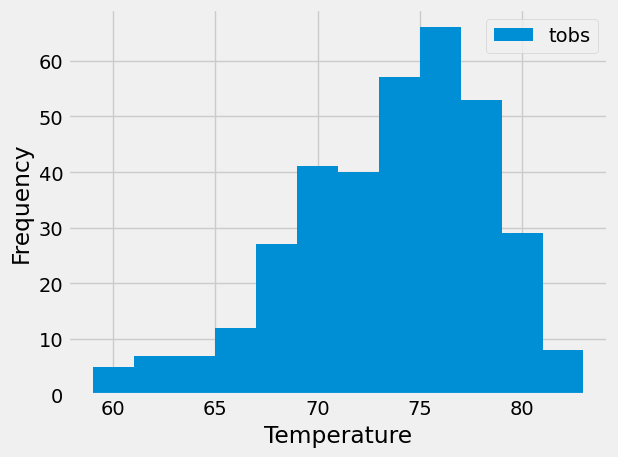

In [125]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_station_subset = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_date).\
    filter(Measurement.station == "USC00519281").all()

yearly_precipitation_df = pd.DataFrame(one_station_subset)

flat_one_station_subset = np.ravel(yearly_precipitation_df)
plt.hist(flat_one_station_subset, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc = 'upper right')
plt.tight_layout()
plt.show()

# Close Session

In [128]:
# Close Session
session.close()